In [2]:
# Cleaning and data manipulation
import pandas as pd
import numpy as np
import datetime

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Statistic test
import scipy.stats as stats

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
airbnb=pd.read_csv('airbnb_cleaned.csv')
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"], errors="coerce")
airbnb.head()

,id,name,host_id,host_name,neighbourhood,room_type,latitude,longitude,price,minimum_nights,availability_365,calculated_host_listings_count,number_of_reviews,number_of_reviews_ltm,reviews_per_month,last_review,host_response_rate,review_scores_rating,area_category
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,Entire home/apt,13.75983,100.54134,1905,3,353,2,65,0,0.50,2020-01-06,100.0,4.86,Inner City
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,Private room,13.66818,100.61674,1316,1,358,2,0,0,0.00,1970-01-01,0.0,0.00,Middle City
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,Private room,13.75232,100.62402,800,60,365,1,0,0,0.00,1970-01-01,0.0,0.00,Middle City
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,Private room,13.78823,100.57256,1286,7,323,1,2,1,0.03,2022-04-01,100.0,4.83,Inner City
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,Private room,13.76872,100.63338,1905,1,365,3,0,0,0.00,1970-01-01,100.0,4.00,Middle City


### **1. Perbedaan Rating Antar Wilayah**

Penelitian ini bertujuan menganalisis bagaimana karakteristik properti Airbnb dan performa host dapat menjelaskan perbedaan rating antar wilayah di Bangkok.

In [5]:
# Rata-rata rating per neighbourhood
avg_rating_neighbourhood = round(airbnb.groupby('neighbourhood')['review_scores_rating'].mean().reset_index().sort_values(by='review_scores_rating', ascending=False),2)

# Rata-rata rating per area_category
avg_rating_area = round(airbnb.groupby('area_category')['review_scores_rating'].mean().reset_index().sort_values(by='review_scores_rating', ascending=False),2)

print(avg_rating_neighbourhood.head())
print(avg_rating_area.head())

           neighbourhood  review_scores_rating
29           Parthum Wan                  3.17
34  Pom Prap Sattru Phai                  2.97
8               Bang Rak                  2.90
31            Phaya Thai                  2.86
41                Sathon                  2.68
  area_category  review_scores_rating
0    Inner City                  2.48
1   Middle City                  2.17
2    Outer City                  1.67


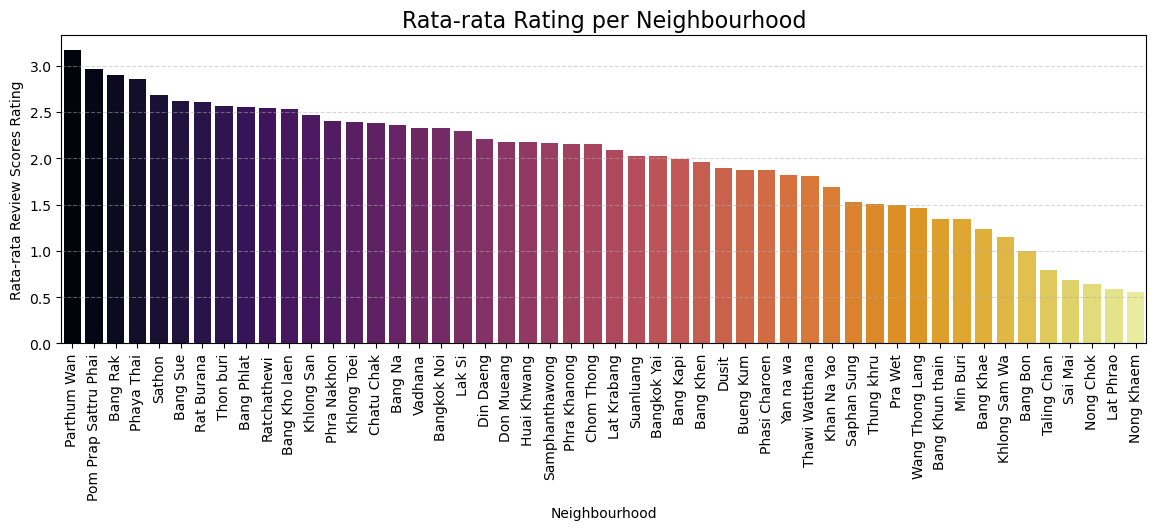

In [6]:
plt.figure(figsize=(14, 4))
sns.barplot(data=avg_rating_neighbourhood, x='neighbourhood', y='review_scores_rating', palette='inferno')
plt.title('Rata-rata Rating per Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Rata-rata Review Scores Rating')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

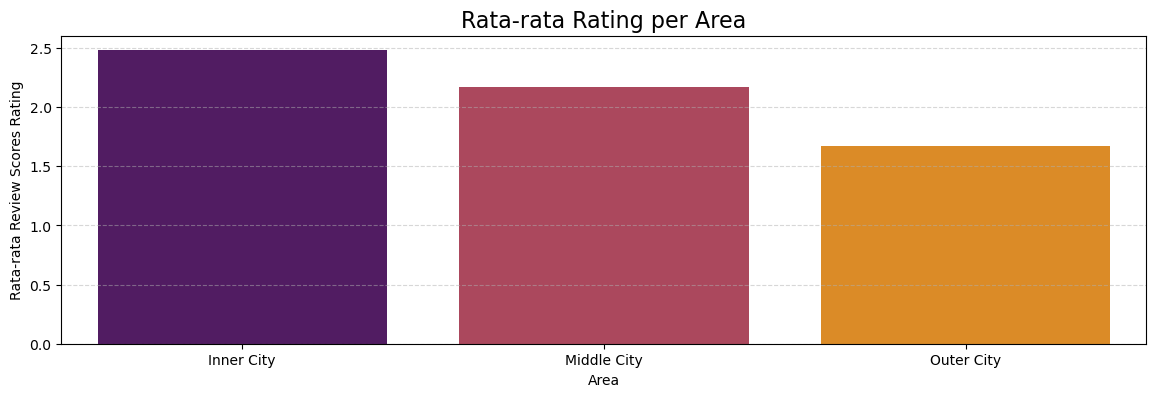

In [7]:
plt.figure(figsize=(14, 4))
sns.barplot(data=avg_rating_area, x='area_category', y='review_scores_rating', palette='inferno')
plt.title('Rata-rata Rating per Area', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Rata-rata Review Scores Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Grafik batang di atas menggambarkan rata-rata skor ulasan (review scores rating) untuk setiap wilayah (neighbourhood) dan (area_category) di Bangkok.

**Interpretasi:**

- Variasi Rating Antar Wilayah: Terdapat variasi yang cukup signifikan dalam rata-rata skor ulasan antar wilayah di Bangkok. Inner City memiliki rata-rata skor yang lebih tinggi dibandingkan wilayah lainnya.
  
**Insight:**

- Pengaruh Lokasi: Lokasi atau wilayah suatu properti memiliki pengaruh yang signifikan terhadap persepsi tamu dan pada akhirnya mempengaruhi skor ulasan.
- Potensial untuk Pengembangan: Wilayah dengan rata-rata skor ulasan yang rendah memiliki potensi untuk meningkatkan kualitas layanan dan fasilitas untuk menarik lebih banyak tamu dan meningkatkan reputasi.

**Pertanyaan untuk Analisis Lebih Lanjut:**

- Apa faktor-faktor yang menyebabkan perbedaan rata-rata skor ulasan antar wilayah? (misalnya, jenis properti yang dominan, harga, atau layanan listing)

In [9]:
# Distribusi room_type per neighbourhood
room_type_dist_neighbourhood = airbnb.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Distribusi room_type per area_category
room_type_dist_area = airbnb.groupby(['area_category', 'room_type']).size().unstack(fill_value=0)

print(room_type_dist_neighbourhood.head())
print(room_type_dist_area.head())

room_type      Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                        
Bang Bon                     2           0             3            0
Bang Kapi                  124           1           132            3
Bang Khae                   35           1            56            0
Bang Khen                   48           3            64            1
Bang Kho laen               93           2            45            0
room_type      Entire home/apt  Hotel room  Private room  Shared room
area_category                                                        
Inner City                5652         456          3464          382
Middle City               3158         178          2158          122
Outer City                 102          14           148           19


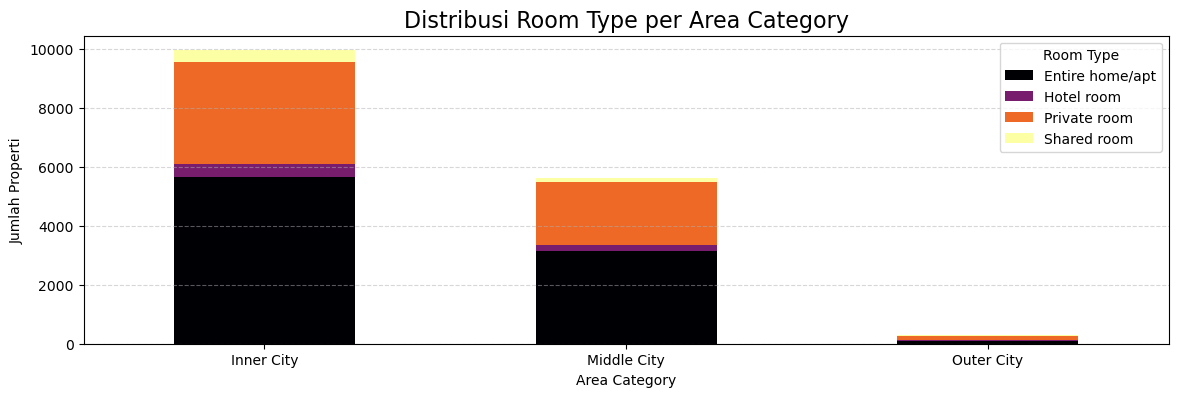

In [10]:
room_type_dist_area.plot(kind='bar', stacked=True, figsize=(14, 4), colormap='inferno')
plt.title('Distribusi Room Type per Area Category', fontsize=16)
plt.xlabel('Area Category')
plt.ylabel('Jumlah Properti')
plt.legend(title='Room Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Grafik batang tumpuk ini menampilkan distribusi tipe kamar (entire home/apt, hotel room, private room, shared room) di setiap kategori wilayah di Bangkok (Inner City, Middle City, Outer City). Setiap batang mewakili total jumlah properti di suatu wilayah, dengan setiap segmen batang menunjukkan proporsi masing-masing tipe kamar

**Interpretasi:**

- Variasi Proporsi Tipe Kamar Antar Wilayah: Terdapat variasi yang cukup terlihat dalam proporsi tipe kamar antar wilayah di Bangkok.

**Insight:**

- Proporsi Terbesar di Inner City: Wilayah Inner City memiliki proporsi total properti yang paling besar dibandingkan dengan Middle City dan Outer City. Ini menunjukkan bahwa Inner City merupakan pusat akomodasi utama di Bangkok.

- Inner City memiliki rating tertinggi saat ini. Kemungkinan disebabkan karena banyaknya jumlah properti dari semua roomtype, didukung dengan Middle City yang berada di-urutan ke 2 dan Outer City di paling akhir.

**Kesimpulan**

Analisis ini  menunjukkan distribusi tipe kamar per wilayah, tetapi belum sepenuhnya menjelaskan mengapa ada perbedaan rating antar wilayah. Untuk mendapatkan wawasan lebih mendalam, perlu ditambahkan beberapa analisis tambahan, seperti:

- Apakah ada faktor lain yang menyebabkan perbedaan rata-rata skor ulasan antar wilayah? (misalnya, harga atau layanan listing)

In [12]:
from scipy.stats import spearmanr

price = airbnb['price']
rating = airbnb['review_scores_rating']
correlation, p_value = spearmanr(price, rating)

print(f"Korelasi antara harga dan rating: {correlation:.5f}")
print(f"P-value: {p_value:.2e}")

Korelasi antara harga dan rating: -0.03404
P-value: 1.82e-05


In [13]:
# Rata-rata harga per neighbourhood
price_nights_neighbourhood = round(airbnb.groupby('neighbourhood')['price'].median().reset_index())

# Rata-rata harga per area_category
price_nights_area = round(airbnb.groupby('area_category')['price'].median().reset_index())

print(price_nights_neighbourhood.head())
print(price_nights_area.head())

   neighbourhood   price
0       Bang Bon  1200.0
1      Bang Kapi   932.0
2      Bang Khae   911.0
3      Bang Khen   882.0
4  Bang Kho laen  1265.0
  area_category   price
0    Inner City  1483.0
1   Middle City  1350.0
2    Outer City  1000.0


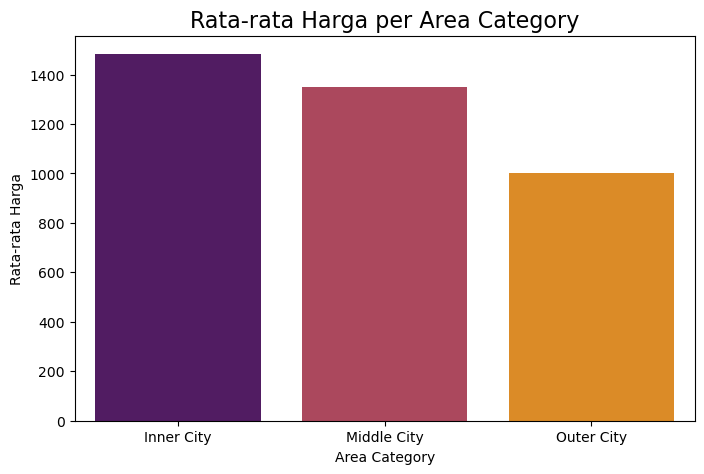

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=price_nights_area, x='area_category', y='price', palette='inferno')
plt.title('Rata-rata Harga per Area Category', fontsize=16)
plt.xlabel('Area Category')
plt.ylabel('Rata-rata Harga')
plt.show()

Grafik batang di atas menunjukkan rata-rata harga per malam untuk properti Airbnb di tiga kategori wilayah di Bangkok: Inner City, Middle City, dan Outer City.

**Interpretasi**

- Inner City mempunyai rata-rata harga yang paling tinggi dibandingkan dengan Middle City dan Outer City.

**Insight**

- Rating Inner City lebih tinggi dari Middle City dan Outer City bukan disebabkan dengan rata-rata harga. Seperti yang tertera di atas, bahwa Inner City tetap mempunyai rating tertinggi walaupun rata-rata harganya juga terbilang cukup tinggi.

**Kesimpulan**

Untuk saat ini, perbedaan rating antar wilayah masih dipengaruhi oleh banyaknya jumlah properti. Namun, kita perlu analisis lebih jauh lagi. Apakah ada faktor lain yang mempengaruhi perbedaan rating antar wilayah? seperti misalnya response/layanan listing.

In [16]:
# Menghitung korelasi Pearson
response = airbnb['host_response_rate']
rating = airbnb['review_scores_rating']
correlation, p_value = spearmanr(response, rating)

print(f"Korelasi antara harga dan rating: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

Korelasi antara harga dan rating: 0.68
P-value: 0.00e+00


In [17]:
# Rata-rata harga per neighbourhood
response_by_neighbourhood = round(airbnb.groupby('neighbourhood')['host_response_rate'].mean().reset_index(),2)

# Rata-rata harga per area_category
response_by_area= round(airbnb.groupby('area_category')['host_response_rate'].mean().reset_index(),2)

print(response_by_neighbourhood.head())
print(response_by_area.head())

   neighbourhood  host_response_rate
0       Bang Bon                0.00
1      Bang Kapi               33.46
2      Bang Khae               27.96
3      Bang Khen               36.22
4  Bang Kho laen               47.68
  area_category  host_response_rate
0    Inner City               47.68
1   Middle City               40.47
2    Outer City               26.70


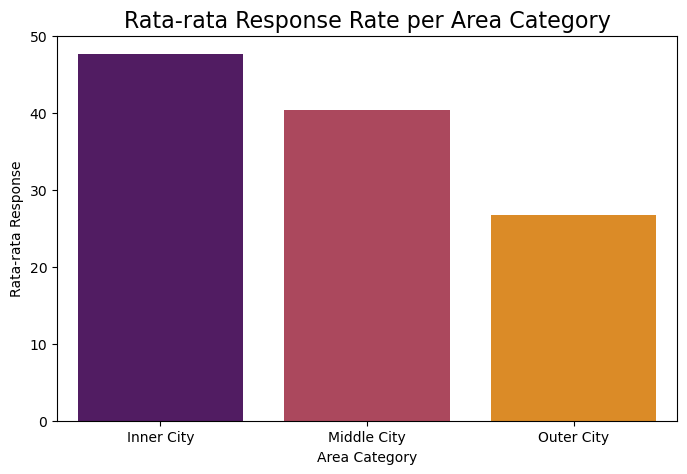

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(data=response_by_area, x='area_category', y='host_response_rate', palette='inferno')
plt.title('Rata-rata Response Rate per Area Category', fontsize=16)
plt.xlabel('Area Category')
plt.ylabel('Rata-rata Response')
plt.show()

Grafik batang di atas menunjukkan rata-rata tingkat respons (host response rate) host Airbnb di tiga kategori wilayah di Bangkok: Inner City, Middle City, dan Outer City. 

**Interpretasi**

- Inner City memiliki rata-rata tingkat respons host yang paling tinggi. Artinya, host di wilayah ini cenderung merespons pertanyaan atau permintaan tamu dengan lebih cepat.

**Insight**

- Faktor ini dapat menjadi salah satu alasan penting mengapa properti di Inner City cenderung memiliki rating yang lebih tinggi dibandingkan wilayah lain, meskipun ekspektasi tamu di area ini mungkin lebih tinggi.

### **Kesimpulan**

Inner City cenderung memiliki rating yang lebih tinggi dibandingkan wilayah lain karena beberapa faktor utama:

**Tingkat Respons Host yang Tinggi**
Host di Inner City menunjukkan tingkat respons yang lebih cepat terhadap pertanyaan atau permintaan tamu. Hal ini meningkatkan kepuasan tamu karena masalah atau kebutuhan mereka dapat segera ditangani, menciptakan pengalaman menginap yang lebih baik.

**Aksesibilitas dan Lokasi Strategis**
Sebagai area pusat kota, Inner City menawarkan akses yang lebih mudah ke berbagai fasilitas dan atraksi. Hal ini menambah daya tarik wilayah tersebut, memberikan pengalaman yang lebih nyaman dan memuaskan bagi tamu.

**Harga yang Kompetitif**
Harga rata-rata di Inner City sekitar 8.27% lebih tinggi dibandingkan dengan Middle City. Hal ini wajar mengingat kemudahan akses ke pusat kota, sehingga banyak tamu yang memilih menginap di Inner City, di mana harga masih tergolong terjangkau dengan sedikit kenaikan dibanding dengan Middle City.

**Pengaruh pada Rating**
Kombinasi tingkat respons host yang tinggi, lokasi strategis, dan harga yang kompetitif menciptakan lingkungan yang mendukung rating tinggi di Inner City. Hal ini menunjukkan bahwa kepuasan tamu tidak hanya dipengaruhi oleh kualitas properti, tetapi juga oleh pengalaman keseluruhan yang melibatkan komunikasi, harga, dan kenyamanan lokasi.

### **2. Dampak Pandemi COVID-19 terhadap Perubahan Preferensi Lokasi Tamu**

Penelitian ini bertujuan untuk mengeksplorasi bagaimana pandemi COVID-19 memengaruhi preferensi tamu terhadap lokasi properti Airbnb di Bangkok. Analisis ini akan mengidentifikasi perubahan pola minat tamu selama dan setelah pandemi, serta mengkaji faktor-faktor yang mungkin memengaruhi pergeseran preferensi tersebut.

In [23]:
def get_covid_period(date):
    if date < pd.Timestamp('2020-03-01'):
        return 'Pre-COVID'
    elif date < pd.Timestamp('2022-01-01'):
        return 'During COVID'
    else:
        return 'Recovery Period'

# Menambahkan kolom periode COVID berdasarkan tanggal review
airbnb['covid_period'] = airbnb['last_review'].apply(get_covid_period)
airbnb_precovid=airbnb[(airbnb['covid_period']=='Pre-COVID')&(airbnb['last_review']>'1970-01-01')]
airbnb_covid=airbnb[airbnb['covid_period']=='During COVID']
airbnb_recovery=airbnb[airbnb['covid_period']=='Recovery Period']

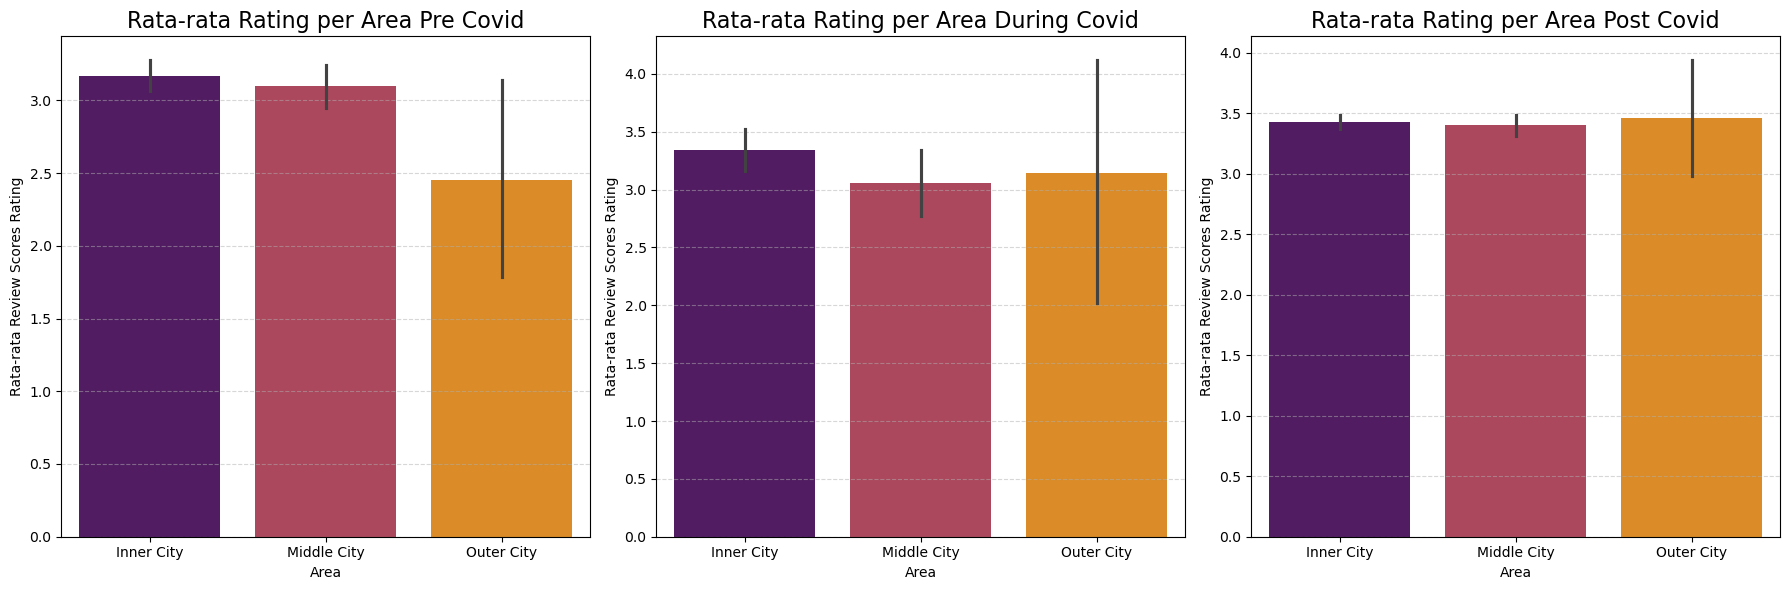

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Pre-COVID
sns.barplot(data=airbnb_precovid, x='area_category', y='review_scores_rating', palette='inferno', ax=axes[0])
axes[0].set_title('Rata-rata Rating per Area Pre Covid', fontsize=16)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Rata-rata Review Scores Rating')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot During-COVID
sns.barplot(data=airbnb_covid, x='area_category', y='review_scores_rating', palette='inferno', 
            order=['Inner City', 'Middle City', 'Outer City'], ax=axes[1])
axes[1].set_title('Rata-rata Rating per Area During Covid', fontsize=16)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Rata-rata Review Scores Rating')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Plot After-COVID
sns.barplot(data=airbnb_recovery, x='area_category', y='review_scores_rating', palette='inferno', 
            order=['Inner City', 'Middle City', 'Outer City'], ax=axes[2])
axes[2].set_title('Rata-rata Rating per Area Post Covid', fontsize=16)
axes[2].set_xlabel('Area')
axes[2].set_ylabel('Rata-rata Review Scores Rating')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

Grafik di atas menyajikan perbandingan rata-rata skor ulasan (rating) untuk properti Airbnb di tiga area berbeda (Inner City, Middle City, dan Outer City) pada tiga periode waktu yang berbeda: sebelum pandemi, selama pandemi, dan setelah pandemi.

**Insight**
- Pada periode pre COVID-19, Inner City menjadi rating tertinggi disusul dengan Middle city dan Outer City. Sama seperti insight sebelumnya, tamu lebih memilih menginap di daerah Inner City karena lokasi yang strategis, response yang tinggi, dan harga yang kompetitif.
- Pada periode during COVID-19, Outer City berhasil menyusul peringkat kedua pada periode selama COVID-19, meskipun Inner City masih mempertahankan posisi sebagai yang tertinggi.
- Pada periode post COVID-19, Outer City menjadi pemegang rating tertinggi mengalahkan Inner City dan Middle City.

**Kesimpulan**

Pandemi COVID-19 telah mengubah secara drastis preferensi tamu Airbnb. Permintaan akan akomodasi yang menawarkan lebih dari sekadar lokasi yang strategis telah meningkat. Faktor-faktor seperti ruang yang lebih luas, lingkungan yang tenang, dan harga yang terjangkau menjadi pertimbangan utama dalam memilih tempat menginap.

**Pertanyaan untuk Analisis Lebih Lanjut:**

- Faktor-faktor yang menyebabkan Outer City berhasil menyalip Inner City sebagai area dengan rating tertinggi setelah pandemi COVID-19?

In [26]:
# Distribusi room_type per area_category
room_type_dist_area_precovid = airbnb_precovid.groupby(['area_category', 'room_type']).size().unstack(fill_value=0)
room_type_dist_area_covid = airbnb_covid.groupby(['area_category', 'room_type']).size().unstack(fill_value=0)
room_type_dist_area_recovery = airbnb_recovery.groupby(['area_category', 'room_type']).size().unstack(fill_value=0)

print('\t\tPersebaran Roomtype Periode Pre COVID-19')
print(room_type_dist_area_precovid.head())
print('\t\tPersebaran Roomtype Periode During COVID-19')
print(room_type_dist_area_covid.head())
print('\t\tPersebaran Roomtype Periode Post COVID-19')
print(room_type_dist_area_recovery.head())

		Persebaran Roomtype Periode Pre COVID-19
room_type      Entire home/apt  Hotel room  Private room  Shared room
area_category                                                        
Inner City                 702         156           732           91
Middle City                408          60           419           28
Outer City                  20           0            21            6
		Persebaran Roomtype Periode During COVID-19
room_type      Entire home/apt  Hotel room  Private room  Shared room
area_category                                                        
Inner City                 402          25           108            5
Middle City                149          16            72            0
Outer City                   7           1             8            0
		Persebaran Roomtype Periode Post COVID-19
room_type      Entire home/apt  Hotel room  Private room  Shared room
area_category                                                        
Inner City                3

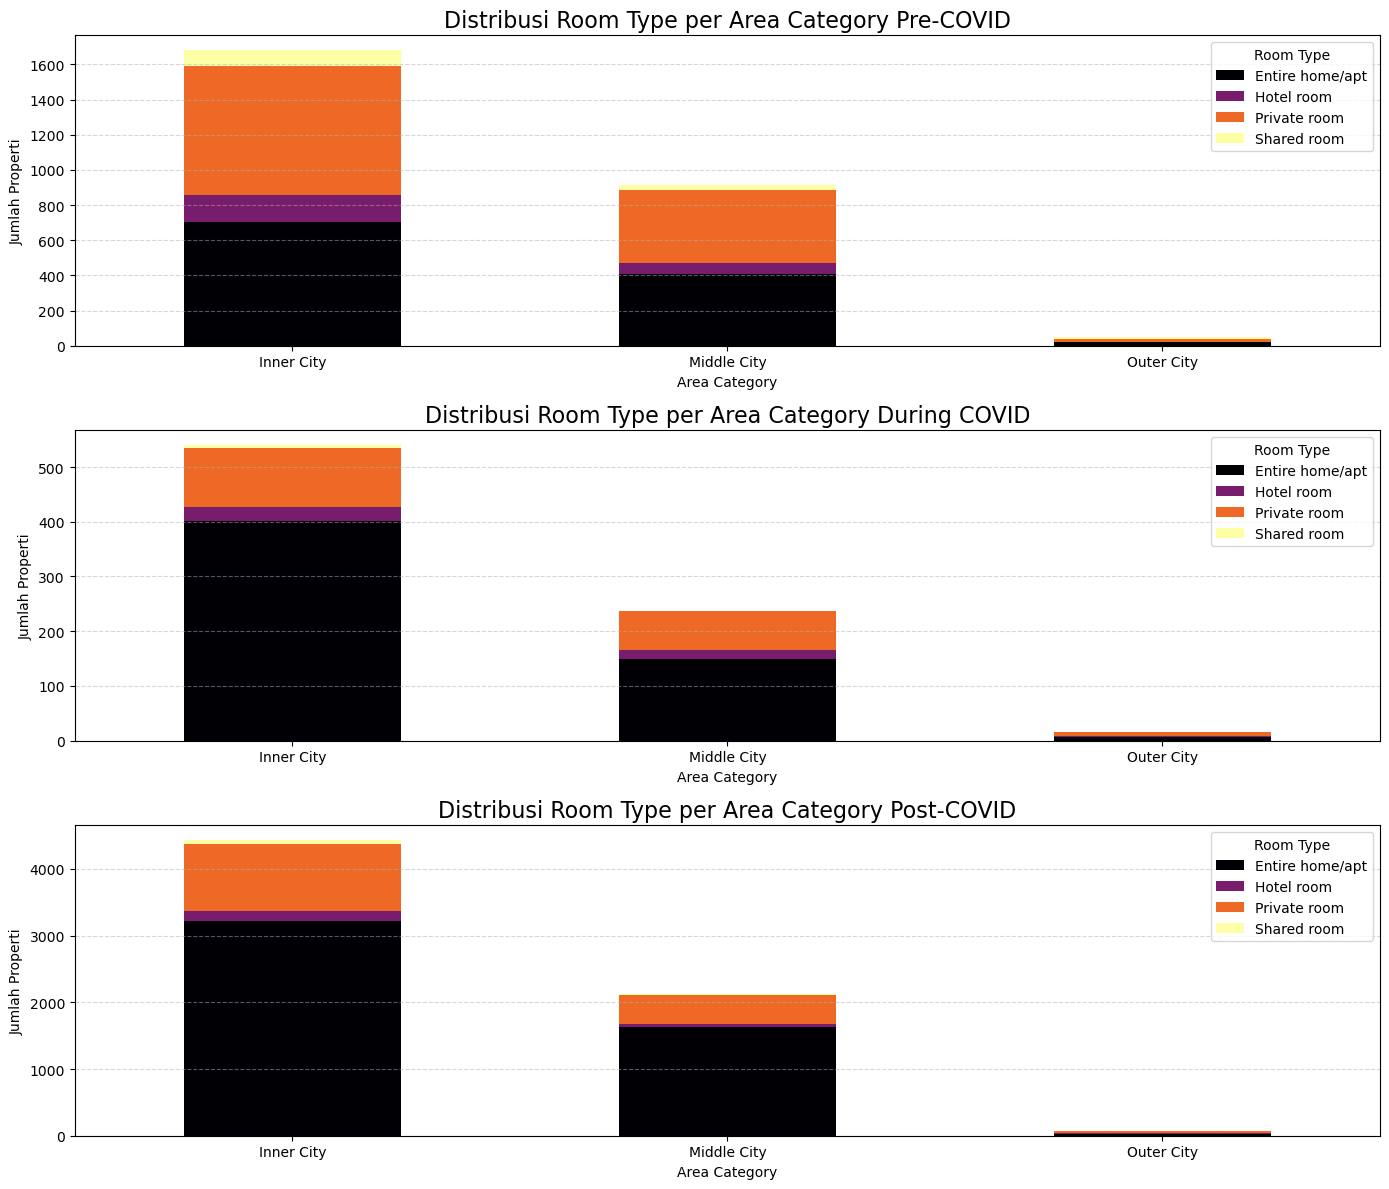

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot untuk room_type_dist_area_precovid
room_type_dist_area_precovid.plot(kind='bar', stacked=True, ax=axes[0], colormap='inferno')
axes[0].set_title('Distribusi Room Type per Area Category Pre-COVID', fontsize=16)
axes[0].set_xlabel('Area Category')
axes[0].set_ylabel('Jumlah Properti')
axes[0].legend(title='Room Type')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].tick_params(axis='x', rotation=0)

# Plot untuk room_type_dist_area_covid
room_type_dist_area_covid.plot(kind='bar', stacked=True, ax=axes[1], colormap='inferno')
axes[1].set_title('Distribusi Room Type per Area Category During COVID', fontsize=16)
axes[1].set_xlabel('Area Category')
axes[1].set_ylabel('Jumlah Properti')
axes[1].legend(title='Room Type')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].tick_params(axis='x', rotation=0)

# Plot untuk room_type_dist_area_recovery
room_type_dist_area_recovery.plot(kind='bar', stacked=True, ax=axes[2], colormap='inferno')
axes[2].set_title('Distribusi Room Type per Area Category Post-COVID', fontsize=16)
axes[2].set_xlabel('Area Category')
axes[2].set_ylabel('Jumlah Properti')
axes[2].legend(title='Room Type')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Grafik batang tumpuk di atas menampilkan distribusi tipe kamar (entire home/apt, hotel room, private room, shared room) di setiap kategori wilayah di Bangkok (Inner City, Middle City, Outer City) pada periode Pre COVID, During COVID, dan Post-Covid. 

**Insight**
- Tidak terjadi perubahan yang signifikan di antara ketiganya. Yang dapat terlihat hanya proporsi tipe ruangan shared room yang semakin menipis pada periode During Covid dan Post-Covid. Hal ini mungkin disebabkan oleh beberapa faktor, seperti meningkatnya preferensi tamu terhadap privasi selama pandemi, yang membuat mereka lebih memilih private room atau entire home/apt untuk menghindari keramaian dan berbagi fasilitas.

**Kesimpulan**
Berdasarkan data distribusi tipe properti ini, kita dapat menyimpulkan bahwa peningkatan jumlah properti di Outer City bukanlah faktor utama yang menyebabkan kenaikan rating setelah pandemi. Jika kenaikan rating semata-mata disebabkan oleh peningkatan jumlah properti, maka kita seharusnya melihat peningkatan proporsi tipe properti tertentu yang mungkin lebih disukai tamu.

**Pertanyaan untuk Analisis Lebih Lanjut:**

- Faktor-faktor yang menyebabkan Outer City berhasil menyalip Inner City sebagai area dengan rating tertinggi setelah pandemi COVID-19?

In [29]:
# Rata-rata harga per area_category
price_area_precovid = round(airbnb_precovid.groupby('area_category')['price'].median().reset_index())
price_area_covid = round(airbnb_covid.groupby('area_category')['price'].median().reset_index())
price_area_recovery = round(airbnb_recovery.groupby('area_category')['price'].median().reset_index())

print('Rata-rata Harga Area Periode Pre COVID-19')
print(price_area_precovid.head())
print('Rata-rata Harga Area During COVID-19')
print(price_area_covid.head())
print('Rata-rata Harga Area Periode Post COVID-19')
print(price_area_recovery.head())

Rata-rata Harga Area Periode Pre COVID-19
  area_category   price
0    Inner City  1300.0
1   Middle City  1200.0
2    Outer City   861.0
Rata-rata Harga Area During COVID-19
  area_category   price
0    Inner City  1200.0
1   Middle City   990.0
2    Outer City   825.0
Rata-rata Harga Area Periode Post COVID-19
  area_category   price
0    Inner City  1500.0
1   Middle City  1364.0
2    Outer City   990.0


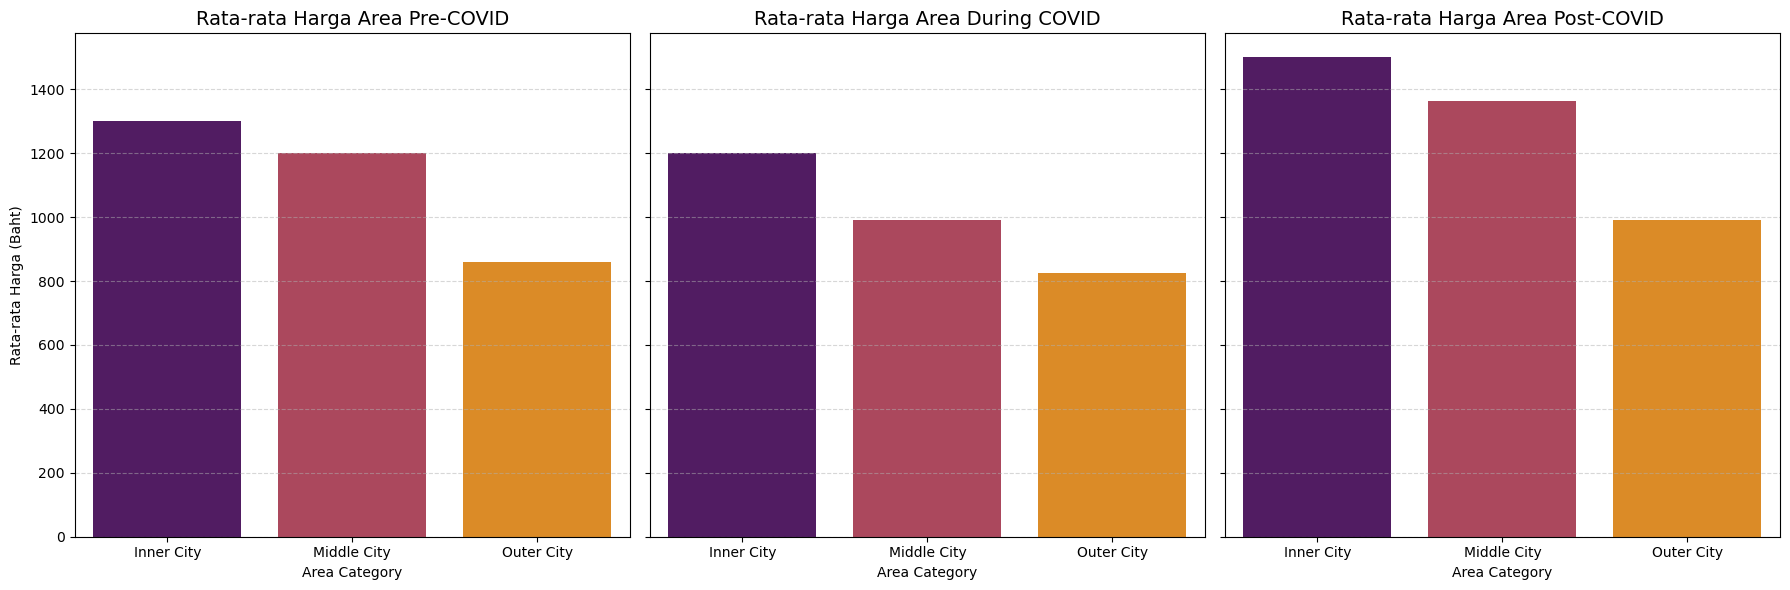

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Pre-COVID
sns.barplot(x='area_category', y='price', data=price_area_precovid, palette='inferno', ax=axes[0])
axes[0].set_title('Rata-rata Harga Area Pre-COVID', fontsize=14)
axes[0].set_xlabel('Area Category')
axes[0].set_ylabel('Rata-rata Harga (Baht)')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# During-COVID
sns.barplot(x='area_category', y='price', data=price_area_covid, palette='inferno', ax=axes[1])
axes[1].set_title('Rata-rata Harga Area During COVID', fontsize=14)
axes[1].set_xlabel('Area Category')
axes[1].set_ylabel('Rata-rata Harga (Baht)')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Post-COVID
sns.barplot(x='area_category', y='price', data=price_area_recovery, palette='inferno', ax=axes[2])
axes[2].set_title('Rata-rata Harga Area Post-COVID', fontsize=14)
axes[2].set_xlabel('Area Category')
axes[2].set_ylabel('Rata-rata Harga (Baht)')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Grafik di atas memberikan gambaran dinamika harga rata-rata di tiga area (Inner City, Middle City, dan Outer City) sebelum, selama, dan setelah pandemi COVID-19. 

**Insight**
- Ketiga area mengalami penurunan harga yang hampir seragam selama pandemi COVID-19, yang kemungkinan disebabkan oleh turunnya permintaan dan penurunan ekonomi akibat lockdown dan pembatasan perjalanan.
- Setelah pandemi (Post-COVID-19), area Outer City menunjukkan harga yang relatif lebih stabil dan tidak terpengaruh signifikan dibandingkan dengan area Inner dan Middle City.

**Kesimpulan**
Kenaikan rating pada area Outer City bisa disebabkan karena kenaikan rata-rata harga yang tidak terlalu tinggi. Namun, kita perlu analisis lebih jauh lagi. Apakah ada faktor lain yang mempengaruhi perubahan rating pada Outer City? seperti misalnya response/layanan listing.

In [32]:
response_by_area_precovid= round(airbnb_precovid.groupby('area_category')['host_response_rate'].mean().reset_index(),2)
response_by_area_covid= round(airbnb_covid.groupby('area_category')['host_response_rate'].mean().reset_index(),2)
response_by_area_recovery= round(airbnb_recovery.groupby('area_category')['host_response_rate'].mean().reset_index(),2)

print('Response Rate Rata-rata Area Periode Pre COVID-19')
print(response_by_area_precovid.head())
print('Response Rate Rata-rata Area During COVID-19')
print(response_by_area_covid.head())
print('Response Rate Rata-rata Area Post COVID-19')
print(response_by_area_recovery.head())

Response Rate Rata-rata Area Periode Pre COVID-19
  area_category  host_response_rate
0    Inner City               36.06
1   Middle City               31.07
2    Outer City               13.53
Response Rate Rata-rata Area During COVID-19
  area_category  host_response_rate
0    Inner City               49.74
1   Middle City               43.96
2    Outer City               18.75
Response Rate Rata-rata Area Post COVID-19
  area_category  host_response_rate
0    Inner City               67.65
1   Middle City               65.29
2    Outer City               67.10


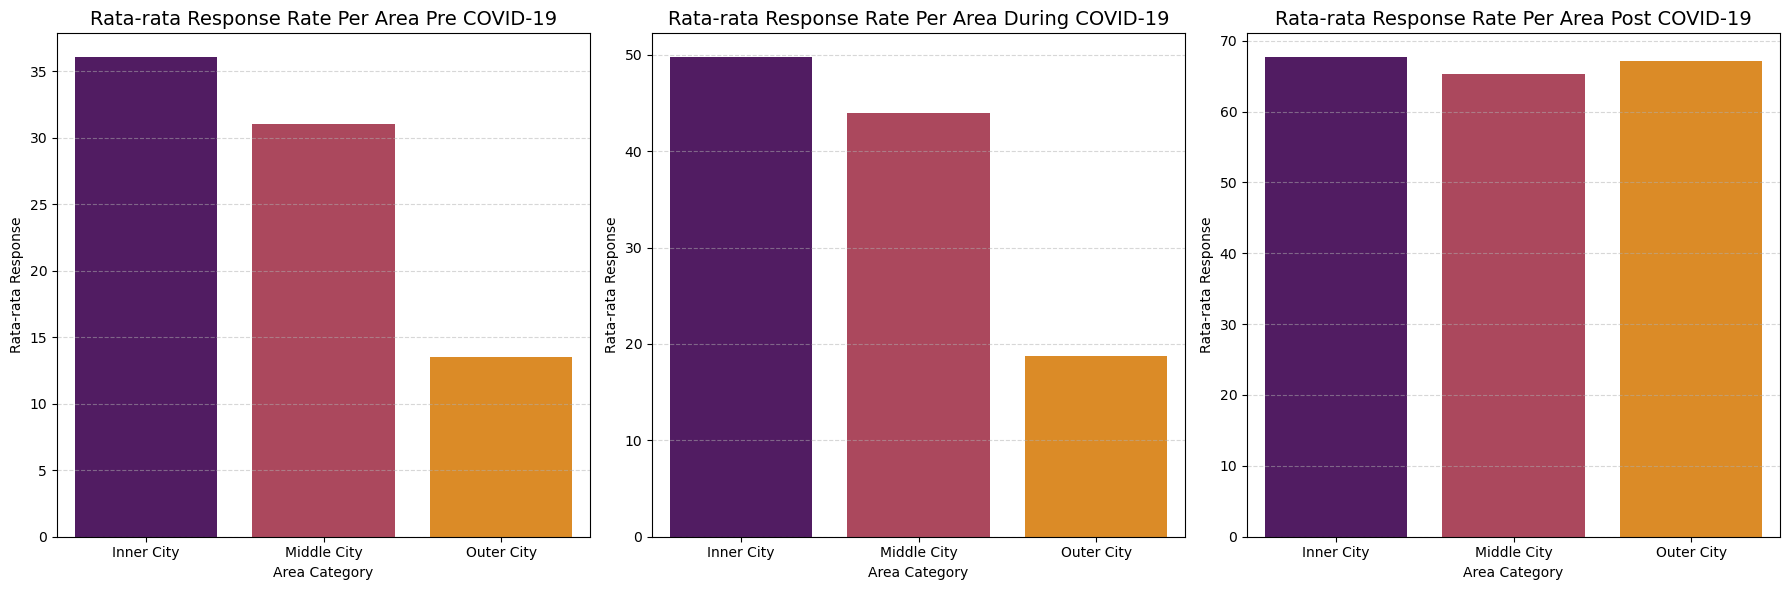

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pre-COVID Response Rate
sns.barplot(data=response_by_area_precovid, x='area_category', y='host_response_rate', palette='inferno', ax=axes[0])
axes[0].set_title('Rata-rata Response Rate Per Area Pre COVID-19', fontsize=14)
axes[0].set_xlabel('Area Category')
axes[0].set_ylabel('Rata-rata Response')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# During-COVID Response Rate
sns.barplot(data=response_by_area_covid, x='area_category', y='host_response_rate', palette='inferno', ax=axes[1])
axes[1].set_title('Rata-rata Response Rate Per Area During COVID-19', fontsize=14)
axes[1].set_xlabel('Area Category')
axes[1].set_ylabel('Rata-rata Response')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Post-COVID Response Rate
sns.barplot(data=response_by_area_recovery, x='area_category', y='host_response_rate', palette='inferno', ax=axes[2])
axes[2].set_title('Rata-rata Response Rate Per Area Post COVID-19', fontsize=14)
axes[2].set_xlabel('Area Category')
axes[2].set_ylabel('Rata-rata Response')
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan rata-rata tingkat respons host (host response rate) di tiga area berbeda (Inner City, Middle City, dan Outer City) pada tiga periode waktu yang berbeda: sebelum pandemi, selama pandemi, dan setelah pandemi.

**Insight**
- Peningkatan response rate pada ketiga area yang seragam.
- Terlebih, area Outer City mengalami peningkatan response rate yang cukup signifikan.

### **Kesimpulan**

**Rating per Area**

- Sebelum pandemi, Inner City memiliki rating tertinggi karena lokasi strategis, tingkat respons host yang cepat, dan harga yang kompetitif.
- Selama pandemi, Outer City mulai menunjukkan peningkatan rating, meskipun Inner City tetap unggul.
- Setelah pandemi, Outer City berhasil menjadi area dengan rating tertinggi, menunjukkan perubahan preferensi tamu terhadap lingkungan yang lebih tenang dan aman. Namun, apakah ada faktor lain?

**Distribusi Tipe Kamar**

- Tidak ada perubahan signifikan dalam distribusi tipe kamar di ketiga area.

**Dinamika Harga**

- Setelah pandemi, Outer City menunjukkan stabilitas harga yang relatif lebih baik dibandingkan Inner dan Middle City, yang berkontribusi pada peningkatan ratingnya.

**Tingkat Respons Host**

Peningkatan response rate terlihat di semua area, terutama di Outer City, yang dapat meningkatkan kepuasan tamu dan memengaruhi kenaikan rating.

**Kesimpulan Akhir**

Pandemi COVID-19 mengubah preferensi tamu Airbnb, dengan fokus pada privasi, lingkungan yang tenang, dan harga yang stabil. Outer City mampu memenuhi kebutuhan ini, yang menyebabkan peningkatan rating pasca-pandemi. Namun, faktor seperti tingkat respons host dan stabilitas harga juga berperan penting dalam meningkatkan kepuasan tamu.

## **Rekomendasi**  

#### **1. Inner City**  
**Karakteristik**: Lokasi strategis dengan akses mudah ke pusat kota, fasilitas, dan atraksi wisata.  
**Rekomendasi**:   
- **Promosi untuk Wisatawan Bisnis dan Urban**  
  Pasarkan Inner City sebagai pilihan utama untuk tamu bisnis atau wisatawan yang menginginkan akses cepat ke pusat kota.  
- **Optimalkan Harga**  
  Tetapkan harga kompetitif dengan diskon untuk masa inap jangka panjang guna menarik pekerja jarak jauh atau digital nomads.  

#### **2. Middle City**  
**Karakteristik**: Area penyangga dengan keseimbangan antara aksesibilitas dan ketenangan.  
**Rekomendasi**:  
- **Tingkatkan Transportasi Lokal**  
  Tawarkan informasi atau layanan antar-jemput untuk memudahkan tamu menjangkau pusat kota dan tempat wisata.  
- **Kampanye ‘Best of Both Worlds’**  
  Tonjolkan kelebihan Middle City sebagai area dengan akses yang cukup baik dan lingkungan yang lebih tenang dibandingkan Inner City.  

#### **3. Outer City**  
**Karakteristik**: Lingkungan yang tenang, jauh dari keramaian, dan cenderung memiliki properti dengan ruang lebih luas.  
**Rekomendasi**:  
- **Promosi untuk Tamu yang Mencari Privasi dan Ketenangan**  
  Pasarkan Outer City sebagai pilihan terbaik untuk tamu yang mencari lingkungan tenang dan jauh dari keramaian.  
- **Tingkatkan Fasilitas Outdoor**  
  Tambahkan fasilitas seperti taman, area barbeque, atau kolam renang untuk menarik tamu keluarga dan wisatawan yang mencari pengalaman relaksasi.  
- **Paket Staycation dan Workation**  
  Promosikan properti Outer City sebagai destinasi staycation atau workation dengan Wi-Fi cepat dan suasana yang mendukung produktivitas.  
- **Harga Kompetitif dan Transparan**  
  Tetapkan harga yang stabil dan kompetitif untuk mempertahankan daya tarik Outer City setelah pandemi.  

Dengan mengimplementasikan strategi khusus per area ini, Airbnb dapat memenuhi kebutuhan yang berbeda dari tamu di setiap kategori wilayah. Hal ini akan membantu mempertahankan kepuasan tamu, meningkatkan okupansi, dan memperkuat posisi Airbnb di pasar Bangkok.

Silakan merujuk ke file selanjutnya untuk melanjutkan analisis.

### **3. Perubahan Pola Musiman**

Penelitian ini bertujuan untuk mengeksplorasi pola musiman dalam industri properti Airbnb di Bangkok, dengan fokus pada perubahan yang terjadi sebelum dan setelah pandemi COVID-19. Analisis ini akan melihat bagaimana perubahan musiman mempengaruhi permintaan dan penawaran properti, serta bagaimana host dapat mengoptimalkan strategi pemasaran dan penetapan harga berdasarkan pola musiman tersebut.

In [39]:
airbnb_precovid=airbnb[(airbnb['covid_period']=='Pre-COVID')&(airbnb['last_review']>'1970-01-01')]
airbnb_covid=airbnb[airbnb['covid_period']=='During COVID']
airbnb_recovery=airbnb[airbnb['covid_period']=='Recovery Period']

# Mengelompokkan data berdasarkan bulan dan periode COVID
airbnb_precovid['month'] = pd.to_datetime(airbnb_precovid['last_review']).dt.month
airbnb_covid['month'] = pd.to_datetime(airbnb_covid['last_review']).dt.month
airbnb_recovery['month'] = pd.to_datetime(airbnb_recovery['last_review']).dt.month

In [40]:
# Menghitung median harga bulanan untuk setiap periode
price_precovid = airbnb_precovid.groupby('month')['price'].median().reset_index()
price_covid = airbnb_covid.groupby('month')['price'].median().reset_index()
price_recovery = airbnb_recovery.groupby('month')['price'].median().reset_index()

# Menambahkan kolom periode
price_precovid['period'] = 'Pre-COVID'
price_covid['period'] = 'During COVID'
price_recovery['period'] = 'Post-COVID'

price_seasonal = pd.concat([price_precovid, price_covid, price_recovery])

# Fungsi untuk mencari peak dan low season untuk setiap periode
def get_price_peak_low_season(price_data, period_name):
    peak = price_data.loc[price_data['price'].idxmax()]
    low = price_data.loc[price_data['price'].idxmin()]
    return f"{period_name} - Peak Season: Bulan {peak['month']} - Harga: {peak['price']}, Low Season: Bulan {low['month']} - Harga: {low['price']}"

print(get_price_peak_low_season(price_precovid, 'Pre-COVID'))
print(get_price_peak_low_season(price_covid, 'During COVID'))
print(get_price_peak_low_season(price_recovery, 'Post-COVID'))

Pre-COVID - Peak Season: Bulan 4 - Harga: 1530.0, Low Season: Bulan 8 - Harga: 1199.5
During COVID - Peak Season: Bulan 1 - Harga: 2680.0, Low Season: Bulan 4 - Harga: 1000.0
Post-COVID - Peak Season: Bulan 12 - Harga: 1557.0, Low Season: Bulan 1 - Harga: 1190.0


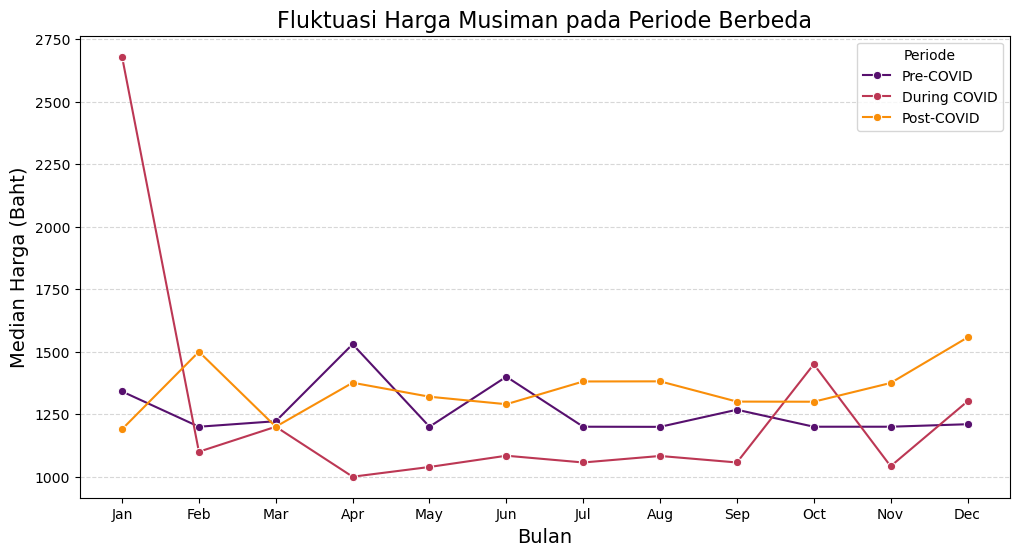

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_seasonal, x='month', y='price', hue='period', marker='o', palette='inferno')
plt.title('Fluktuasi Harga Musiman pada Periode Berbeda', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Median Harga (Baht)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Periode')
plt.show()

Grafik ini memberikan gambaran yang jelas tentang bagaimana harga sewa Airbnb di Bangkok berubah dari waktu ke waktu, terutama dipengaruhi oleh musim dan pandemi COVID-19.

**Insight**

1. Pola Peak Season:
- Pre-COVID: Peak season di pertengahan tahun (April)
- During COVID: Peak season bergeser ke awal tahun (Januari)
- Post-COVID: Peak season bergeser ke akhir tahun (Desember)

4. Tren Musiman:
- Agustus konsisten menjadi periode harga rendah di semua periode
- Akhir tahun (Desember) menunjukkan tren kenaikan, terutama post-COVID
- Awal tahun (Januari-Februari) menunjukkan pola yang berbeda di setiap periode

In [43]:
# Mengelompokkan data berdasarkan bulan dan periode COVID
reviews_precovid = airbnb_precovid.groupby('month')['number_of_reviews'].mean().reset_index()
reviews_covid = airbnb_covid.groupby('month')['number_of_reviews'].mean().reset_index()
reviews_recovery = airbnb_recovery.groupby('month')['number_of_reviews'].mean().reset_index()

# Menambahkan kolom periode
reviews_precovid['period'] = 'Pre-COVID'
reviews_covid['period'] = 'During COVID'
reviews_recovery['period'] = 'Post-COVID'

reviews_seasonal = pd.concat([reviews_precovid, reviews_covid, reviews_recovery])

# Fungsi untuk mencari peak dan low season untuk setiap periode
def get_review_peak_low_season(review_data, period_name):
    peak = review_data.loc[review_data['number_of_reviews'].idxmax()]
    low = review_data.loc[review_data['number_of_reviews'].idxmin()]
    return f"{period_name} - Peak Season: Bulan {peak['month']} - Jumlah Ulasan: {peak['number_of_reviews']}, Low Season: Bulan {low['month']} - Jumlah Ulasan: {low['number_of_reviews']}"

print(get_review_peak_low_season(reviews_precovid, 'Pre-COVID'))
print(get_review_peak_low_season(reviews_covid, 'During COVID'))
print(get_review_peak_low_season(reviews_recovery, 'Post-COVID'))

Pre-COVID - Peak Season: Bulan 2 - Jumlah Ulasan: 20.100204498977504, Low Season: Bulan 4 - Jumlah Ulasan: 6.954802259887006
During COVID - Peak Season: Bulan 1 - Jumlah Ulasan: 35.63636363636363, Low Season: Bulan 12 - Jumlah Ulasan: 14.5
Post-COVID - Peak Season: Bulan 12 - Jumlah Ulasan: 40.66315155167219, Low Season: Bulan 2 - Jumlah Ulasan: 15.575757575757576


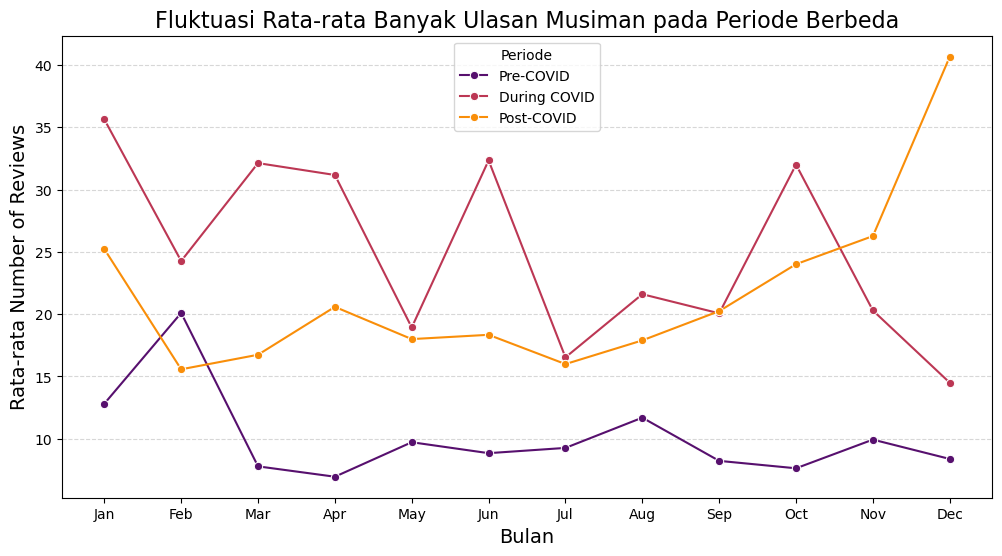

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_seasonal, x='month', y='number_of_reviews', hue='period', marker='o', palette='inferno')
plt.title('Fluktuasi Rata-rata Banyak Ulasan Musiman pada Periode Berbeda', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata Number of Reviews', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Periode')
plt.show()

Grafik ini memberikan gambaran yang jelas tentang bagaimana jumlah ulasan Airbnb di Bangkok berubah dari waktu ke waktu, terutama dipengaruhi oleh musim dan pandemi COVID-19.

**Insight**

1. Pola Peak Season:
- Pre-COVID: Peak season di awal tahun (Februari)
- During COVID: Peak season bergeser ke awal tahun (Januari)
- Post-COVID: Peak season bergeser ke akhir tahun (Desember)

4. Tren Musiman:
- Akhir tahun ke awal tahun (Desember-Januari) menunjukkan tren kenaikan, terutama during COVID dan post-COVID
- Peningkatan yang signifikan dari pertengahan tahun ke akhir tahun yang konsisten pada periode post-COVID

In [46]:
# Mengelompokkan data berdasarkan bulan dan periode COVID
ratings_precovid = airbnb_precovid.groupby('month')['review_scores_rating'].mean().reset_index()
ratings_covid = airbnb_covid.groupby('month')['review_scores_rating'].mean().reset_index()
ratings_recovery = airbnb_recovery.groupby('month')['review_scores_rating'].mean().reset_index()

# Menambahkan kolom periode
ratings_precovid['period'] = 'Pre-COVID'
ratings_covid['period'] = 'During COVID'
ratings_recovery['period'] = 'Post-COVID'

ratings_seasonal = pd.concat([ratings_precovid, ratings_covid, ratings_recovery])

# Fungsi untuk mencari peak dan low season untuk setiap periode
def get_ratings_peak_low_season(ratings_data, period_name):
    peak = ratings_data.loc[ratings_data['review_scores_rating'].idxmax()]
    low = ratings_data.loc[ratings_data['review_scores_rating'].idxmin()]
    return f"{period_name} - Peak Season: Bulan {peak['month']} - Rata-rata Ulasan: {peak['review_scores_rating']}, Low Season: Bulan {low['month']} - Rata-rata Ulasan: {low['review_scores_rating']}"

print(get_ratings_peak_low_season(ratings_precovid, 'Pre-COVID'))
print(get_ratings_peak_low_season(ratings_covid, 'During COVID'))
print(get_ratings_peak_low_season(ratings_recovery, 'Post-COVID'))

Pre-COVID - Peak Season: Bulan 7 - Rata-rata Ulasan: 3.3876712328767127, Low Season: Bulan 10 - Rata-rata Ulasan: 2.813157894736842
During COVID - Peak Season: Bulan 10 - Rata-rata Ulasan: 3.7763636363636364, Low Season: Bulan 1 - Rata-rata Ulasan: 2.4145454545454546
Post-COVID - Peak Season: Bulan 5 - Rata-rata Ulasan: 3.5676250000000005, Low Season: Bulan 3 - Rata-rata Ulasan: 2.836279069767442


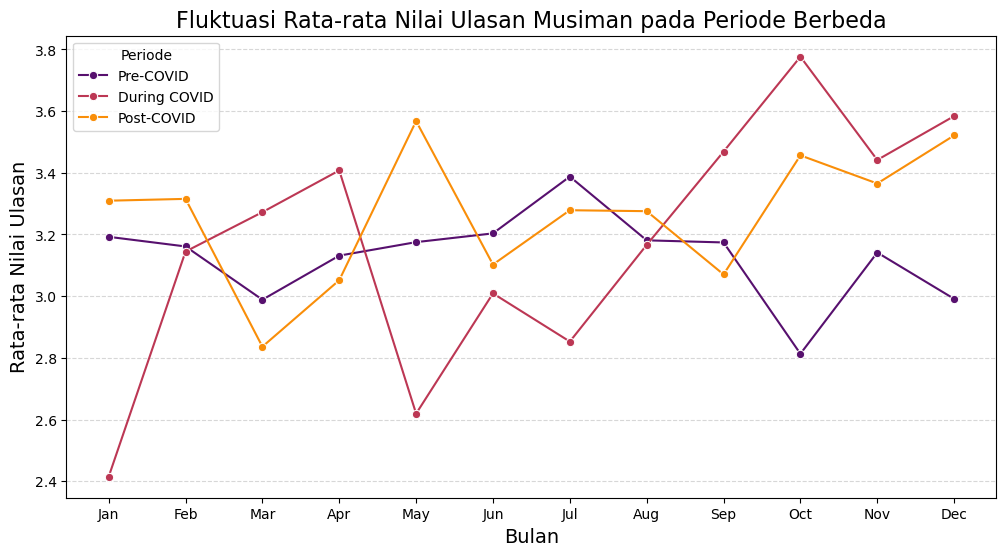

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratings_seasonal, x='month', y='review_scores_rating', hue='period', marker='o', palette='inferno')
plt.title('Fluktuasi Rata-rata Nilai Ulasan Musiman pada Periode Berbeda', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata Nilai Ulasan', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Periode')
plt.show()

Grafik ini memberikan gambaran yang jelas tentang bagaimana rata-rata nilai ulasan Airbnb di Bangkok berubah dari waktu ke waktu, terutama dipengaruhi oleh musim dan pandemi COVID-19.

**Insight**

1. Pola Peak Season:
- Pre-COVID: Peak season di pertengahan tahun (Juli)
- During COVID: Peak season bergeser ke akhir tahun (Oktober)
- Post-COVID: Peak season bergeser ke pertengahan tahun (Mei)

4. Tren Musiman:
- Pada periode pre COVID, terlihat fluktuasi musiman yang relatif stabil
- Fluktuasi musiman menjadi lebih tajam, dengan beberapa bulan menunjukkan penurunan yang signifikan pada periode During COVID
- Post COVID memiliki pola fluktuasi mulai kembali mendekati pola sebelum pandemi, namun dengan level rata-rata yang sedikit lebih rendah.

### **Kesimpulan**

**Perubahan Musiman yang Signifikan akibat Pandemi:**

- Sebelum pandemi (Pre-COVID), puncak musim sewa Airbnb terjadi pada pertengahan tahun (April) dan nilai ulasan cenderung tinggi pada pertengahan tahun (Juli). Tren harga juga relatif stabil, dengan harga lebih rendah di bulan Agustus.
- Selama pandemi (During COVID), pola musiman mengalami perubahan signifikan. Puncak musim bergeser ke awal tahun (Januari), yang kemungkinan disebabkan oleh perubahan preferensi tamu dan pembatasan perjalanan. Selain itu, banyak properti cenderung mengalami harga rendah yang lebih konsisten di bulan-bulan tertentu.
- Setelah pandemi (Post-COVID), musim puncak beralih ke akhir tahun (Desember), yang menunjukkan kembalinya permintaan seiring dengan meningkatnya perjalanan dan pariwisata. Meskipun ada perubahan dalam puncak musim, beberapa tren musiman seperti harga tinggi di akhir tahun dan harga rendah di Agustus tetap konsisten.


**Fluktuasi Okupansi dan Ulasan:**

- Jumlah ulasan juga menunjukkan perubahan musiman yang signifikan. Pre-COVID, puncak okupansi terjadi pada awal tahun (Februari), yang menunjukkan banyaknya wisatawan yang memilih menginap di Bangkok pada musim sejuk.
- Selama pandemi, okupansi cenderung bergeser ke Januari, dengan beberapa bulan lainnya menunjukkan penurunan ulasan secara signifikan, menggambarkan penurunan pariwisata dan pembatasan perjalanan global.
- Setelah pandemi, okupansi kembali meningkat, terutama pada akhir tahun (Desember), menunjukkan kembalinya daya tarik Bangkok sebagai destinasi wisata utama. Peningkatan yang signifikan dari pertengahan tahun ke akhir tahun menunjukkan bahwa wisatawan mulai kembali dengan penuh antusiasme.


**Pengaruh pada Rating:**

- Sebelum pandemi, fluktuasi rating cenderung stabil dengan puncak di pertengahan tahun. Namun, pandemi menyebabkan fluktuasi yang lebih tajam, dengan beberapa bulan mengalami penurunan rating yang signifikan.
- Setelah pandemi, meskipun fluktuasi rating kembali mendekati pola sebelum pandemi, tingkat rata-rata rating sedikit lebih rendah, menunjukkan adanya perubahan dalam harapan tamu terhadap kebersihan dan kualitas akomodasi.


**Kesimpulan Akhir:**

- Pandemi COVID-19 telah memengaruhi pola musiman harga, okupansi, dan rating properti Airbnb di Bangkok. Sebelum pandemi, puncak musiman terjadi pada pertengahan tahun, tetapi setelah pandemi, perubahan perilaku perjalanan telah memengaruhi pergeseran musim puncak ke periode akhir tahun dan awal tahun.
- Wisatawan kini lebih memilih periode yang lebih aman dan tenang, dengan tingkat okupansi meningkat pada akhir tahun dan harga sewa lebih tinggi.

### **Rekomendasi**

1. **Penyesuaian Harga Berdasarkan Musim:**
   - **Peak Season (Akhir Tahun dan Awal Tahun):**
     - Pada bulan Desember dan Januari, harga sewa bisa ditingkatkan secara moderat. Selama periode ini, permintaan wisatawan kembali meningkat, terutama pada bulan-bulan liburan. Tetapi, hindari menaikkan harga secara drastis, tetapi pastikan harga tetap mencerminkan nilai pasar.
     - Pada puncak musim liburan (Desember-Januari), pastikan untuk melakukan pemasaran yang agresif dengan menonjolkan kenyamanan dan kemudahan akses ke tempat-tempat wisata utama di Bangkok.
   - **Low Season (Agustus dan Bulan-bulan Sepi):**
     - Pada bulan Agustus dan bulan lainnya dengan okupansi rendah, strategi harga yang lebih terjangkau atau diskon khusus dapat menarik lebih banyak tamu
     - Tawarkan diskon untuk pemesanan yang dilakukan lebih awal untuk meningkatkan pemesanan di bulan-bulan low season.
   - **Middle Season (Musim Musim Transisi):**
     - Pada bulan-bulan yang tidak terlalu ramai, pastikan harga tetap kompetitif dan fleksibel. Menyesuaikan harga dengan musim transisi bisa membantu menjaga okupansi stabil.
       
2. **Peningkatan Pengalaman Tamu untuk Meningkatkan Rating:**
   - **Kebersihan dan Keamanan:** Pandemi COVID-19 telah meningkatkan ekspektasi tamu terhadap kebersihan. Teruskan fokus pada standar kebersihan yang ketat dan pastikan tamu merasa aman. Menyediakan desinfektan, masker, dan hand sanitizer bisa meningkatkan rating positif.
   - **Personalisasi Pengalaman Tamu:** Berikan sentuhan personal untuk meningkatkan kepuasan tamu, seperti menyediakan panduan lokal, rekomendasi restoran, atau layanan tambahan selama musim liburan. Hal ini dapat membuat tamu merasa lebih dihargai dan meningkatkan kemungkinan mereka memberikan rating tinggi.
   - **Tingkat Respons Host:** Pastikan untuk merespons tamu dengan cepat, terutama pada periode puncak musim. Menjaga tingkat respons tinggi akan membantu menjaga rating tetap positif.
   - **Menangani Ulasan Negatif dengan Bijak:** Jika ada ulasan negatif, pastikan untuk meresponsnya dengan sopan dan profesional. Tawarkan solusi atau klarifikasi masalah dengan cara yang positif agar tamu merasa dihargai.

Dengan melaksanakan rekomendasi ini, pemilik properti Airbnb dapat lebih efektif menyesuaikan diri dengan perubahan musiman yang dipengaruhi oleh pandemi, serta meningkatkan pengalaman tamu dan mengoptimalkan pendapatan sepanjang tahun.